## Lecture 4 - Graphical Network Models

This lecture covers probability distributions over networks. For example, we see a network of interest, its metrics and we want to know whether or not the behavior seen is special in any way or how could this network could've been generated.

In [5]:
import numpy as np
import pandas as pd
import networkx as nn
from matplotlib import pyplot as plt
from scipy.special import comb

### 3. Erdos-Renyi Model

Simplest model: Fix the number of nodes and the number of edges and places edges uniformly at random. The Erdos-Renyi model is similar to this, where each edge between nodes is formed with probability $p [0, 1]$ independently of other edges. The probability follows a binomial distribution.

#### Erdos-Renyi Model

In [8]:
# Number of nodes
n = 12

# Generate a complete graph with n nodes
G = nn.complete_graph(n)

# Get the number of edges
m = G.number_of_edges()
print('Number of edges: ', m)

# The number of edges in a complete graph (G(n, 1)) should be given by C(n, 2)
print('Number of edges (Estimate): ', comb(n, 2, exact=True))

Number of edges:  66
Number of edges (Estimate):  66


#### Degree Distribution

Sum of degrees:  10
Number of edges:  5
Seems like the sum of degrees is twice the number of edges: K = 2m


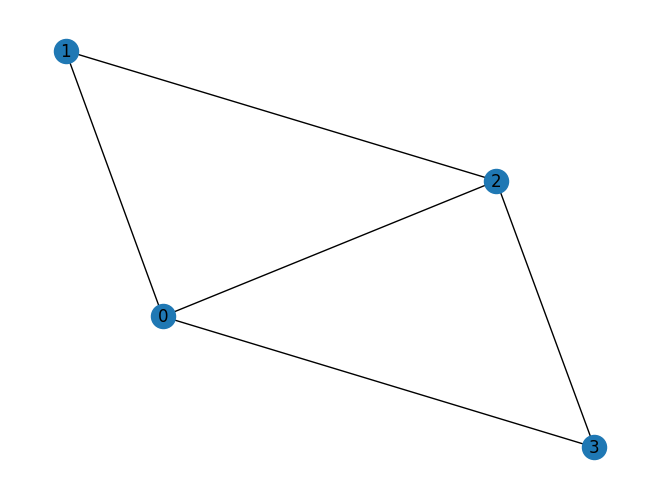

In [12]:
# Create a graph with the following adjacency matrix
A = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 0],
    [1, 1, 0, 1],
    [1, 0, 1, 0]
])

# Create a graph from the adjacency matrix
G = nn.from_numpy_array(A)  

# Get the sum of the degrees of all nodes
print('Sum of degrees: ', sum([degree for _, degree in G.degree()]))

# Get the number of edges
print('Number of edges: ', G.number_of_edges())
print("Seems like the sum of degrees is twice the number of edges: K = 2m")

# Plot the graph
nn.draw(G, with_labels=True)
plt.show()

#### Graph Structure

In [18]:
# ============================================== #
# CASE 1                                         #
# ============================================== #

# Suppose you have a graph with n = 1 x 10^6 nodes and m = 200 x 10^3 edges
n = 1e6
m = 200e3
print(f"Case 1 (n = 1e6, m = 200e3):")

# What would you expect to see if the process that created this graph can be described by 
# an Erdos-Renyi model?

# Get the maximum likelihood estimate of the probability of an edge
p = m / comb(n, 2, exact=True)

# As the n approaches infinity, the probability of an edge starts displaying three
# distinct phases. The phase limits are the following
lim1 = 1/n
lim2 = np.log(n)/n

# We check in which phase is the probability of an edge
if p < lim1:
    print('Phase 1: The graph displays many small components')
elif p < lim2 and p >= lim1:
    print('Phase 2: A giant component is formed.')
else:
    print('Phase 3: The giant component includes all nodes, becoming a complete graph.')

# ============================================== #
# CASE 2                                         #
# ============================================== #

print()
print(f"Case 2 (n = 1e6, m = 20e6):")
n = 1e6
m = 20e6

# Get the maximum likelihood estimate of the probability of an edge
p = m / comb(n, 2, exact=True)

# As the n approaches infinity, the probability of an edge starts displaying three
# distinct phases. The phase limits are the following
lim1 = 1/n
lim2 = np.log(n)/n

# We check in which phase is the probability of an edge
if p < lim1:
    print('Phase 1: The graph displays many small components')
elif p < lim2 and p >= lim1:
    print('Phase 2: A giant component is formed.')
else:
    print('Phase 3: The giant component includes all nodes, becoming a complete graph.')

Case 1 (n = 1e6, m = 200e3):
Phase 1: The graph displays many small components

Case 2 (n = 1e6, m = 20e6):
Phase 3: The giant component includes all nodes, becoming a complete graph.


### 4. Configuration Model

#### Number of stub pairs

In [20]:
# Suppose that node "i" has degree "k_i" and node "j" has degree "k_j" in a configuration
# model with "n" nodes and "m" edges. What is the total number of possible pairings of stubs
# between these two nodes? 

# The total number of possible pairings of stubs between these two nodes is given by
# k_i * k_j

# Suppose that we have selected a stub from node "i", what is the probability of it being
# connected to a particular stub in the model?

# The probability of selecting a stub from node "i" is given by
# 1 / (2m - 1) since 2m is the total number of stubs, and a stub cannot connect to itself
# (hence the -1). A 1 is added to the numerator since we are considering 1 stub from node "i"k

### 5. Price's Model and Small-World Model

#### Circulant Model

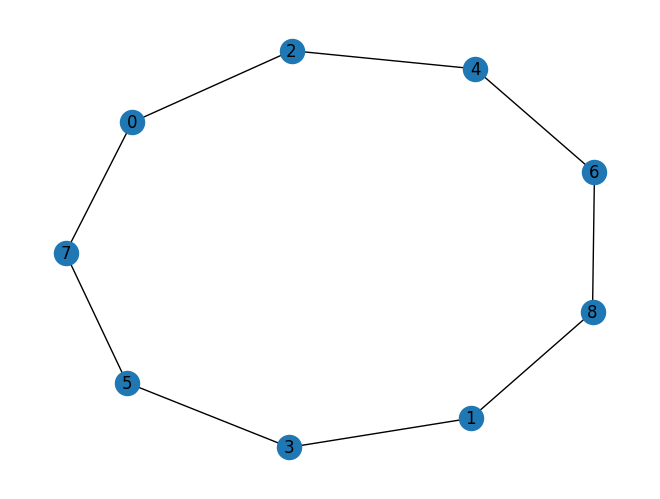

The circulant graph consists of a cycle graph


In [22]:
# Generate a circulant graph with n = 9 and c = 2
n = 9
c = 2
G = nn.circulant_graph(n, [c])

# Plot the graph
nn.draw(G, with_labels=True)
plt.show()

print("The circulant graph consists of a cycle graph")